# Plotting univariate data in ggplot

Updating notebook 1 to also include `borough`.

### Python and R Setup

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Import packages in R

In [7]:
%%R
#install.packages("tidyverse")
require('ggplot2')
require('readr')
require('dplyr')
require('tidyr')

Loading required package: ggplot2
Loading required package: readr
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: tidyr


### Read data

In [8]:
%%R

# Read data
df <- read_csv('housing_data.csv')
df

Rows: 189 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): borough
dbl (11): zip, population, pct_hispanic_or_latino, pct_asian, pct_american_i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 189 × 12
     zip population borough  pct_hispanic_or_latino pct_asian
   <dbl>      <dbl> <chr>                     <dbl>     <dbl>
 1 11368     112088 QUEENS                    76.5      11.6 
 2 11385     107796 QUEENS                    45.0       6.46
 3 11211     103123 BROOKLYN                  24.1       5.53
 4 11208     101313 BROOKLYN                  40.6       6.01
 5 10467     101255 BRONX                     52.1       5.68
 6 11236     100844 BROOKLYN                   7.66      2.58
 7 11226      99558 BROOKLYN                  16.4       3.07
 8 11373      94437 QUEENS                    41.7

### Histogram

👉 Try It

Grab your histogram code from the previous exercise (or just use the sample below) 

- modify the code to plot one histogram per borough 
- add a meaningful title and subtitle and axis labels

_(hint: this may require you to look up how `facet_wrap` works)._

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


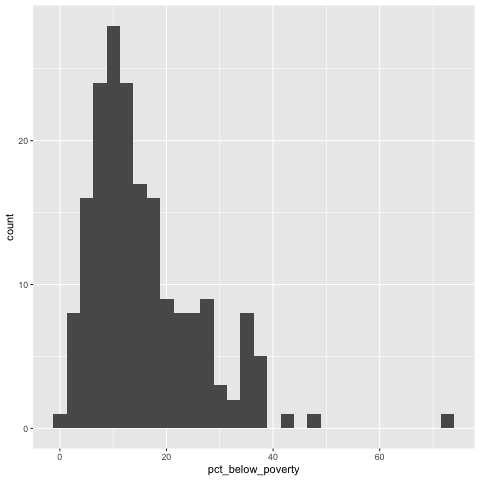

In [9]:
%%R 

ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram() 

### Dotplot

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might want to change the `y` aesthetic instead of using `facet_wrap`)._

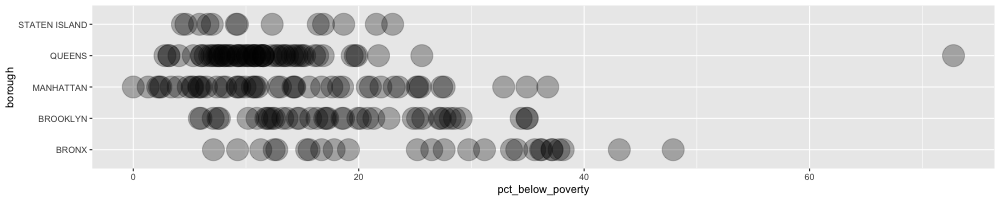

In [11]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough) +
    geom_point(alpha=.3, size=10)

### Dotplot (with jitter)

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might also need to mess with the y axis, but also the colors of the dots)._

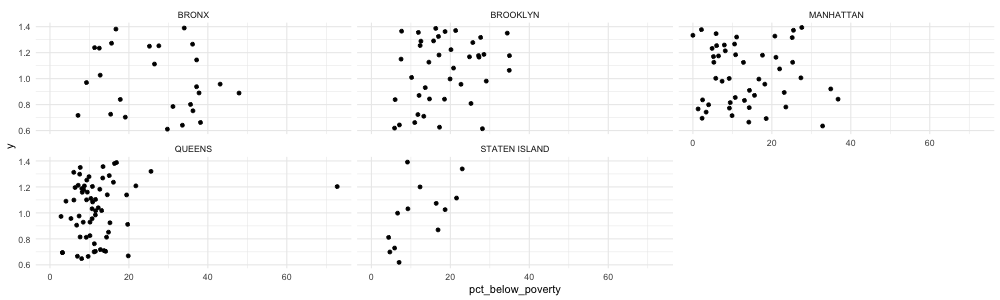

In [17]:
%%R -w 1000 -h 300

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    facet_wrap(~borough)+
    geom_jitter()+
    theme_minimal()

### Density Plot

👉 Try It

Grab your density plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough


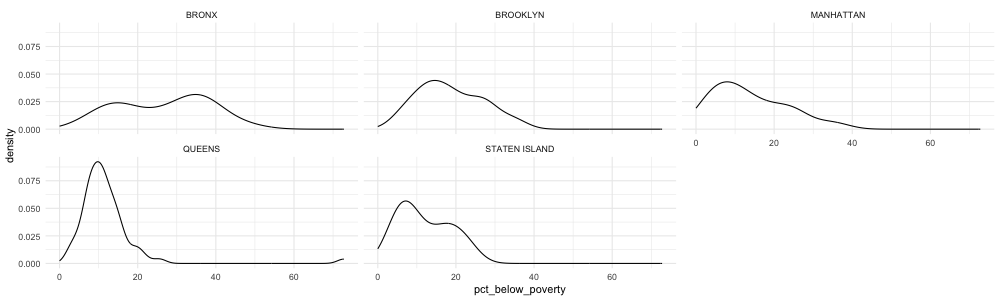

In [21]:
%%R -w 1000 -h 300
ggplot(df) + 
    aes(x=pct_below_poverty) + 
    geom_density() + 
    facet_wrap(~borough)+ 
    theme_minimal()

### Box and Whisker Plot
http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization



👉 Try It

Grab your box and whisker plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

👉 Bonus
- see if you can annotate the biggest oulier


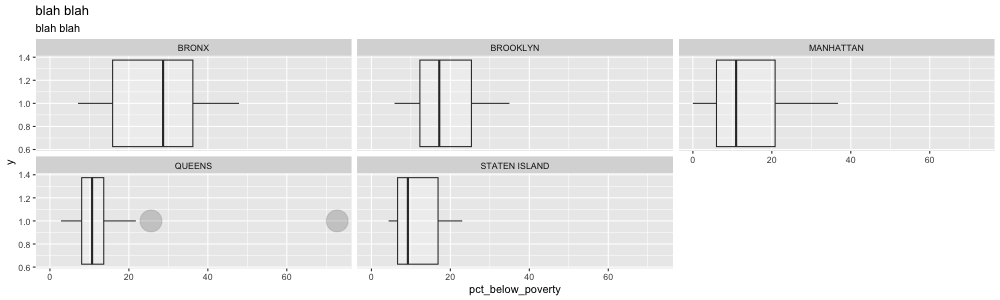

In [27]:
%%R -w 1000 -h 300

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) + 
    geom_boxplot(alpha=.2,outlier.size=10) + 
    facet_wrap(~borough) + 
    labs (
        title = "blah blah",
        subtitle = "blah blah"
    )

### Violin Plot

👉 Try It

Grab your violin plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- write about how this chart looks different from the box and whisker plot and for what purpose it may be more useful
> write your answer here



Error in print(..., self = self) : unused argument (useS4 = FALSE)


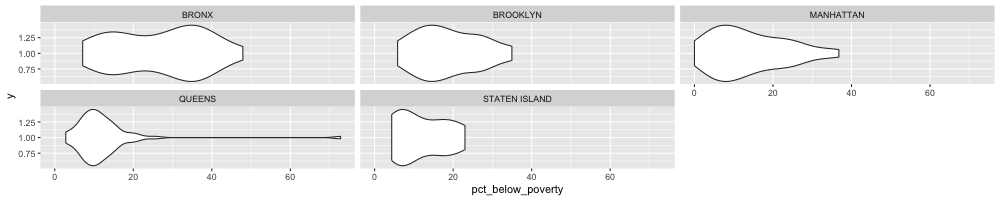

In [31]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    facet_wrap(~borough)+
    geom_violin()

Both Violin Plots and Box Plots are used for visualizing data distributions, but Violin Plots are often more informative because they show more details about the data's shape. Violin Plot might be more useful than a Box Plot in: 
1. Shows the Full Distribution: A Box Plot only displays summary statistics (median, quartiles, and potential outliers).
A Violin Plot includes a kernel density estimation (KDE), showing how data is distributed beyond just the quartiles.
This helps you see if the data is unimodal, bimodal, or skewed, which a Box Plot can sometimes hide.
2. Reveals Density & Skewness: Reveals Density & Skewness
In a Box Plot, you can see the spread of data but not how densely it's packed at different values.
A Violin Plot widens at values where data is more concentrated and narrows where data is sparse.
This is especially helpful if you have skewed data or multiple peaks.
3. Useful for Small Sample Sizes
Box Plots rely on quartiles and may not show much variation in small datasets.
Violin Plots retain more information, making them more useful when data points are limited.
4. Helps Compare Distributions Across Groups
When plotting multiple categories (e.g., poverty rates across boroughs), a Violin Plot can clearly show variations in data distribution within each category, while a Box Plot only compares medians and IQRs.

## BUT 

If you only care about summary statistics (median, quartiles, outliers), a Box Plot is simpler and cleaner.
When you have large datasets, Violin Plots might become too dense and hard to interpret.

### Beeswarm 
👉 Bonus

Grab your beeswarm code from the previous exercise

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

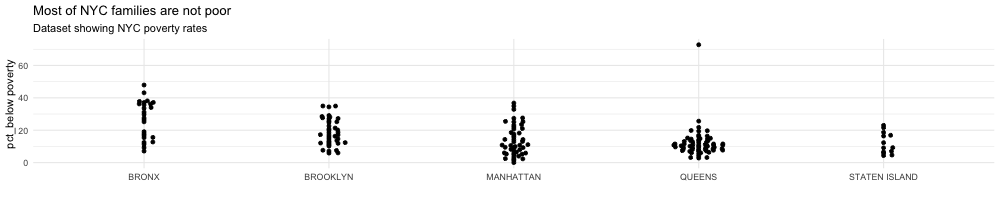

In [34]:
%%R -w 1000 -h 200
library('ggbeeswarm')

ggplot(df) +
    aes(x = borough, y = pct_below_poverty) +
    geom_beeswarm() +
    labs(
        x = '',
        y = 'pct_below poverty',
        title = 'Most of NYC families are not poor', 
        subtitle = 'Dataset showing NYC poverty rates'
    ) +
    theme_minimal()


A Beeswarm Plot is useful when you want to visualize individual data points while avoiding overlap, making it a great alternative to Box Plots and Violin Plots when the dataset is small to medium-sized. When NOT to Use a Beeswarm Plot

- If your dataset is very large → Use a Violin Plot instead, since Beeswarm can become unreadable.
- If you only need a quick summary → A Box Plot is simpler.
- If you're comparing too many categories → Too many Beeswarm groups can make interpretation harder.